In [76]:
#import libraries and datasets

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
#create knn class model

def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))
    
class knn:
    def __init__(self, k):
        self.k = k
        
    def fit(self,X,y):
        #store X and y into variables
        self.X_train = X
        self.y_train = y 
    
    def predict(self,X):
        #X has multiple values
        pred = [self.knn_algo(x) for x in X] 
        #in the form of a list so convert into a array
        return np.array(pred)
        
    def knn_algo(self,x):
        '''Calculate distances.
        Find the nearest ones (indices and labels) 
        Find the majority of the nearest ones'''
        distance = [euc_dist(x, xtr) for xtr in self.X_train]
        indices = np.argsort(distance)[:self.k]
        labels = [self.y_train[i] for i in indices]
        majority = Counter(labels).most_common(1)
        return majority[0][0]     
    
    

In [83]:
#import the data and perform train test split

data_iris = datasets.load_iris()

In [65]:
X, y = data_iris.data, data_iris.target

In [66]:
X.shape

(150, 4)

In [67]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [68]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [69]:
data_iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [90]:
data_iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

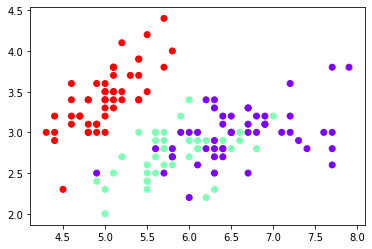

In [70]:
plt.scatter(X[:,0], X[:,1], c= y, cmap = ('rainbow_r'))

In [138]:
#call the function and implement knn

nearest_neighbour = knn(k=7)
nearest_neighbour.fit(X_train, y_train)
k_pred = nearest_neighbour.predict(X_test)

In [139]:
#find metrics: Accuracy, F1 score, Precision and Recall

accuracy = accuracy_score(y_test, k_pred)
print("Accuracy = ", accuracy)
precision = precision_score(y_test, k_pred, average='micro')
print("Precision = ", precision)
recall = recall_score(y_test, k_pred, average = 'micro')
print("Recall = ", recall)
F1_score = f1_score(y_test, k_pred, average = 'micro')
print("F1_score = ", F1_score)

Accuracy =  0.9666666666666667
Precision =  0.9666666666666667
Recall =  0.9666666666666667
F1_score =  0.9666666666666667


In [140]:
#Comparing the performance with KNN algorithm from sklearn

sk_knn = KNeighborsClassifier(n_neighbors=7)
sk_knn.fit(X_train, y_train)
sk_pred = sk_knn.predict(X_test)

In [141]:
accuracy = accuracy_score(y_test, sk_pred)
print("Accuracy = ", accuracy)
precision = precision_score(y_test, sk_pred, average='micro')
print("Precision = ", precision)
recall = recall_score(y_test, sk_pred, average = 'micro')
print("Recall = ", recall)
F1_score = f1_score(y_test, sk_pred, average = 'micro')
print("F1_score = ", F1_score)

Accuracy =  0.9666666666666667
Precision =  0.9666666666666667
Recall =  0.9666666666666667
F1_score =  0.9666666666666667


Hardcoding KNN gives same results as SciKit Learn's KNN Classifier for the iris dataset

In [149]:
import os
os.getcwd()

'C:\\Users\\Reya'